# <center> Work on Quantum Classifier <center>

In [7]:
!pip install pennylane

In [8]:
import sys 
import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np

In [9]:
#Prime Factorization
def factorizer(n) : 
  v = []
  n = int(n)
  out = ''
  for i in range(1000) : 
    v.append(1)

  for j in range(2, n) : 
    if v[j] : 
      k = 2
      while k * j <= n :
        v[k * j] = 0
        k += 1

  for i in range(2, n) : 
      if v[i] : 
        out += str(i) + ''

  return out

In [10]:
n = int(9)
print(factorizer(n))

2357


In [11]:
n = int(5)
print(factorizer(n))

23


In [12]:
#Shor's Algorithm
def Hadamard(n) : 
  def Hn(H = np.array([[1, 1], [1, -1]], dtype = np.complex64), n = n) : 
    if n > 1 : 
      return Hn(H = np.kron(np.array([[1, 1], [1, -1]], dtype = np.complex64), H), n = n - 1)
    return H

  return Hn(n = n)

def QFT(t) :
  Q = np.zeros(shape = (2 ** t, 2 ** t), dtype = np.complex64)
  N = 2 ** t
  for i in range(N) : 
    for j in range(N) : 
      Q[i][j] = np.exp(np.pi * 2j * ((i * j) % N) / N)

  return Q


N = 21
t = 9
H = Hadamard(t)

reg1 = np.zeros(shape = (2 ** t), dtype = np.complex64)
reg2 = np.ones(shape = (2 ** t), dtype = np.complex64)
reg1[0] = 1
reg1 = H.dot(reg1)

for i in range(2 ** t) : 
  reg2[i] = 2 ** i % N

r = reg2[0]

for i in range(2 ** t) : 
  if reg2[i] != r :
    reg1[i] = 0

Q = QFT(9)
reg1 = np.linalg.inv(Q).dot(reg1)
print(abs(reg1))
print(abs(reg1[0]))
print(abs(reg1[85]))
print(abs(reg1[86]))

[1.6796875e-01 1.3022459e-03 1.3027369e-03 1.3035553e-03 1.3047025e-03
 1.3061815e-03 1.3079941e-03 1.3101412e-03 1.3126278e-03 1.3154586e-03
 1.3186365e-03 1.3221672e-03 1.3260565e-03 1.3303105e-03 1.3349367e-03
 1.3399416e-03 1.3453360e-03 1.3511259e-03 1.3573236e-03 1.3639394e-03
 1.3709842e-03 1.3784715e-03 1.3864142e-03 1.3948291e-03 1.4037305e-03
 1.4131356e-03 1.4230633e-03 1.4335347e-03 1.4445705e-03 1.4561944e-03
 1.4684314e-03 1.4813092e-03 1.4948571e-03 1.5091076e-03 1.5240939e-03
 1.5398547e-03 1.5564300e-03 1.5738652e-03 1.5922063e-03 1.6115061e-03
 1.6318221e-03 1.6532179e-03 1.6757584e-03 1.6995191e-03 1.7245783e-03
 1.7510355e-03 1.7789828e-03 1.8085327e-03 1.8398035e-03 1.8729328e-03
 1.9080710e-03 1.9453851e-03 1.9850621e-03 2.0273167e-03 2.0723834e-03
 2.1205326e-03 2.1720717e-03 2.2273508e-03 2.2867697e-03 2.3507902e-03
 2.4199474e-03 2.4948642e-03 2.5762671e-03 2.6650182e-03 2.7621358e-03
 2.8688421e-03 2.9866099e-03 3.1172335e-03 3.2629212e-03 3.4264226e-03
 3.611

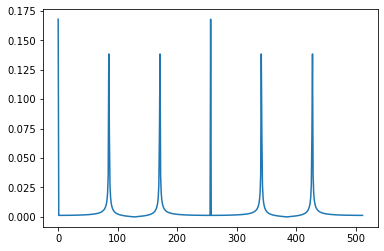

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(abs(reg1))
plt.show()

In [6]:
#Work on Quantum computing applied to Machine Learning
dev1 = qml.device('default.qubit', wires=1)
@qml.qnode(dev1)
def circuit(params) : 
  qml.RX(params[0], wires = 0)
  qml.RY(params[1], wires = 0)
  qml.RX(params[0], wires = 0)
  qml.RY(params[1], wires = 0)
  return qml.expval(qml.PauliZ(0))

print(circuit([0.54, 0.12]))

def cost(x) : 
  return circuit(x)

init_params = np.array([0.011, 0.012])
print(cost(init_params))

opt = qml.GradientDescentOptimizer(stepsize = 0.4)
steps = 100
params = init_params

for i in range(steps) :
  params = opt.step(cost, params)

  if (i + 1) % 5 == 0:
    print('Cost after step {:5d} : {: .7f}'.format(i + 1, cost(params)))

print('Optimized rotation angles : {}'.format(params))

0.45039465275606094
0.9994700584297429
Cost after step     5 : -0.6860713
Cost after step    10 : -0.7794672
Cost after step    15 : -0.9927786
Cost after step    20 : -0.9999548
Cost after step    25 : -0.9999997
Cost after step    30 : -1.0000000
Cost after step    35 : -1.0000000
Cost after step    40 : -1.0000000
Cost after step    45 : -1.0000000
Cost after step    50 : -1.0000000
Cost after step    55 : -1.0000000
Cost after step    60 : -1.0000000
Cost after step    65 : -1.0000000
Cost after step    70 : -1.0000000
Cost after step    75 : -1.0000000
Cost after step    80 : -1.0000000
Cost after step    85 : -1.0000000
Cost after step    90 : -1.0000000
Cost after step    95 : -1.0000000
Cost after step   100 : -1.0000000
Optimized rotation angles : [8.37226027e-17 1.57079633e+00]
